In [1]:
import pickle as pkl
import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import h5py
from scipy.special import softmax

#model="/srv/scratch/anusri/chrombpnet_paper/experimental_scripts/GM12878/4_4_shifted_ATAC_uncorrected_experimental_counts_var1_08.20.2021/uncorrected_model/"
model="/srv/scratch/anusri/chrombpnet_paper/experimental_scripts/GM12878/var0/"

import numpy as np
from scipy.stats import entropy

In [2]:
pfile=model+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_1=f['lab_1'][:]
pred_1=f['pred_1'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


#bias_pred_0_softmax=softmax(pred_0,axis=1)

['chr1', '804558', '.']


In [3]:
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
def density_scatter(x, y, xlab, ylab, ax = None, sort = True, bins = 20,xlim=(4,11),ylim=(4,11)):
    """
    Scatter plot colored by 2d histogram
    """
    bad_indices=np.where(np.isnan(x))+np.where(np.isnan(y))
    x=x[~np.isin(np.arange(x.size),bad_indices)]
    y=y[~np.isin(np.arange(y.size),bad_indices)]

    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0
    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xlim(xlim)
    plt.ylim(ylim)
    return ax

(10866,)


<AxesSubplot:xlabel='LogCount Labels', ylabel='LogCount Predictions'>

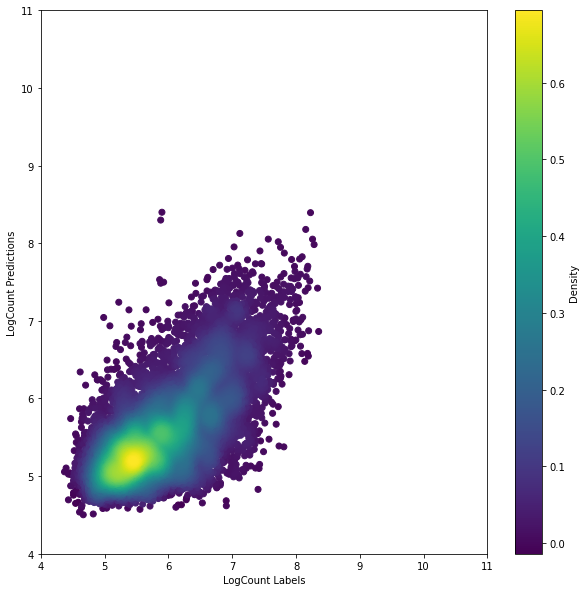

In [4]:
plt.rcParams["figure.figsize"] = (10,10)

print(labels_1.shape) 
density_scatter(np.squeeze(labels_1), np.squeeze(pred_1), xlab="LogCount Labels", ylab="LogCount Predictions")






